In [38]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

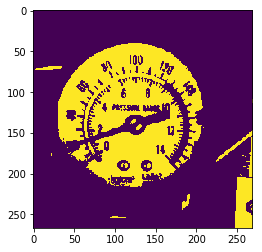

In [53]:
# 輪郭抽出
# i = cv2.imread("gauge-10.jpg")
# im = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
# imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
# ret,thresh = cv2.threshold(imgray,210,255,0)
# image,contours,hirearchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
# plt.imshow(image)

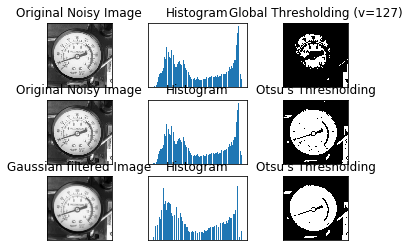

In [42]:
##大津の二値化
##閾値の計算を自動化してくれる。入力画像がbimodal imageである必要がある。
##

# original = cv2.imread('gauge-10.jpg')
# im = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
# img = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)
# # global thresholding
# ret1,th1 = cv2.threshold(img,237,255,cv2.THRESH_BINARY)

# # Otsu's thresholding
# ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# # Otsu's thresholding after Gaussian filtering
# blur = cv2.GaussianBlur(img,(5,5),0)
# ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# # plot all the images and their histograms
# images = [img, 0, th1,
#           img, 0, th2,
#           blur, 0, th3]
# titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
#           'Original Noisy Image','Histogram',"Otsu's Thresholding",
#           'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

# for i in range(3):
#     plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
#     plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    
#     plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
#     plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    
#     plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
#     plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
# plt.show()

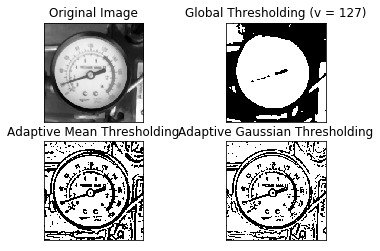

In [58]:
# 適応的閾値処理
i = cv2.imread('gauge-10.jpg')
im = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
imgg = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(imgg,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(imgg,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(imgg,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [imgg, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()